In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

dataset=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQlM2tat2DbRFUyldK-ZBFE2BIUdEaQpnXShc6uRvzlOes2Sevze-KEPpFd3-I4aB-lp6G5eVrHzUXK/pub?gid=466965807&single=true&output=csv')

In [3]:
#View the top 5 datasets
dataset.head()

,employee_id,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0
1,65141,Operations,region_22,Bachelor's,m,middle,other,1,30,5.0,4,0,60,1,0.31,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,senior,other,2,39,1.0,10,0,50,4,0.64,0
4,48945,Technology,region_26,Bachelor's,m,senior,other,1,45,3.0,2,0,73,2,0.95,0


In [4]:
#Checking dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   job_level             78298 non-null  object 
 6   recruitment_channel   78298 non-null  object 
 7   no_of_trainings       78298 non-null  int64  
 8   age                   78298 non-null  int64  
 9   previous_year_rating  72362 non-null  float64
 10  length_of_service     78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  satisfaction_score    78298 non-null  int64  
 14  engagement_score      78298 non-null  float64
 15  is_promoted        

In [5]:
#Null data check
dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education               3443
gender                     0
job_level                  0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
awards_won?                0
avg_training_score         0
satisfaction_score         0
engagement_score           0
is_promoted                0
dtype: int64

In [6]:
#The creation of the 'cleaned_dataset' variable which contains the dataset has been cleaned by filling in the data in the column containing the null value and deleting the unused column

cleaned_dataset=dataset.copy()
cleaned_dataset['education']=cleaned_dataset['education'].fillna('No Data')
cleaned_dataset['previous_year_rating']=cleaned_dataset['previous_year_rating'].fillna(cleaned_dataset['previous_year_rating'].median())
cleaned_dataset=cleaned_dataset.drop(['employee_id'], axis=1)
cleaned_dataset=cleaned_dataset.rename(columns={'is_promoted':'label'})
cleaned_dataset.isnull().sum()


department              0
region                  0
education               0
gender                  0
job_level               0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
satisfaction_score      0
engagement_score        0
label                   0
dtype: int64

In [7]:
#Checking the cleaned dataset information
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            78298 non-null  object 
 1   region                78298 non-null  object 
 2   education             78298 non-null  object 
 3   gender                78298 non-null  object 
 4   job_level             78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    78298 non-null  int64  
 12  satisfaction_score    78298 non-null  int64  
 13  engagement_score      78298 non-null  float64
 14  label                 78298 non-null  int64  
dtypes: float64(2), int6

In [8]:
cleaned_dataset['label'].value_counts()

0    77072
1     1226
Name: label, dtype: int64

C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


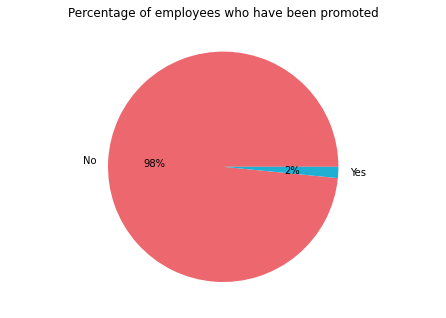

In [35]:
#Visualizing Percentage is promoted
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No', 'Yes']
label = cleaned_dataset.label.value_counts()
ax.pie(label, labels=labels, autopct='%.0f%%', colors=('#ED676F', '#1FAFD2'))
plt.title('Percentage of employees who have been promoted')
plt.show()

C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  import sys


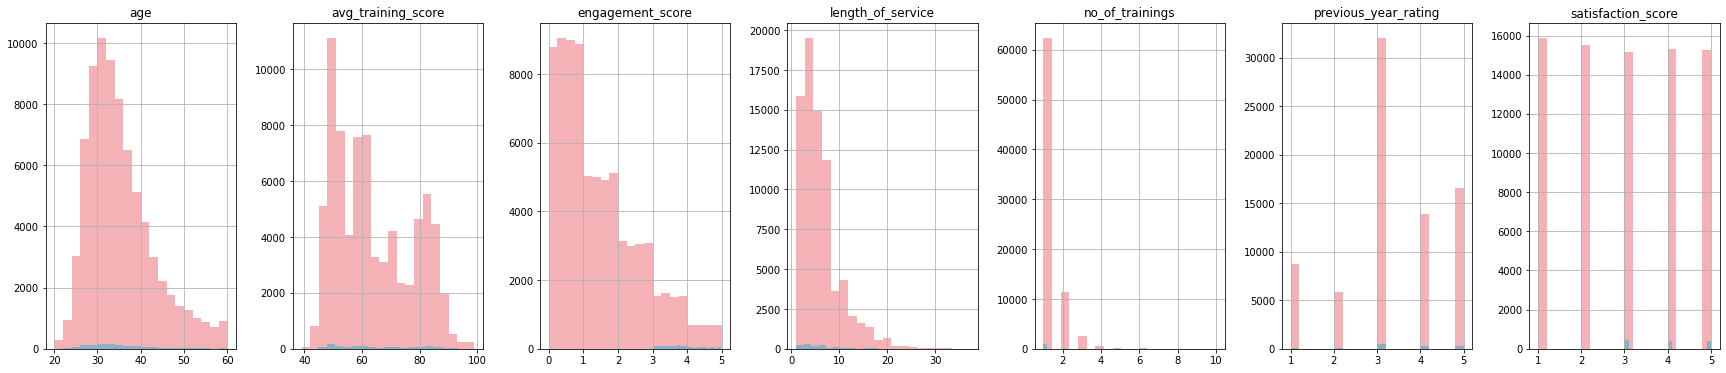

In [34]:
#Exploratory Data Analysis (EDA) Numerical Variables
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score', 'satisfaction_score', 'engagement_score']
fig, ax = plt.subplots(1, 7, figsize=(30, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and red, respectively
cleaned_dataset[cleaned_dataset.label == 0][numerical_features].hist(bins=20, color='#ED676F', alpha=0.5, ax=ax)
cleaned_dataset[cleaned_dataset.label == 1][numerical_features].hist(bins=20, color='#1FAFD2', alpha=0.5, ax=ax)
plt.show()

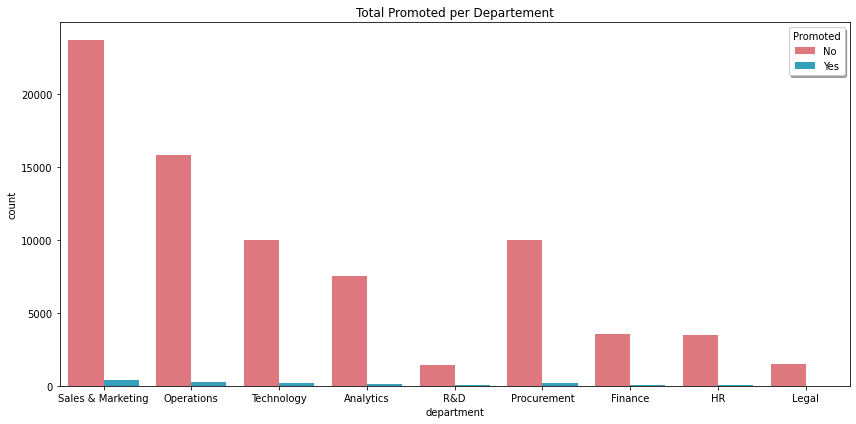

In [15]:
#Exploratory Data Analysis (EDA) Categorical Variables
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='department',hue='label',palette=('#ED676F', '#1FAFD2'))
plt.title('Total Promoted per Departement')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

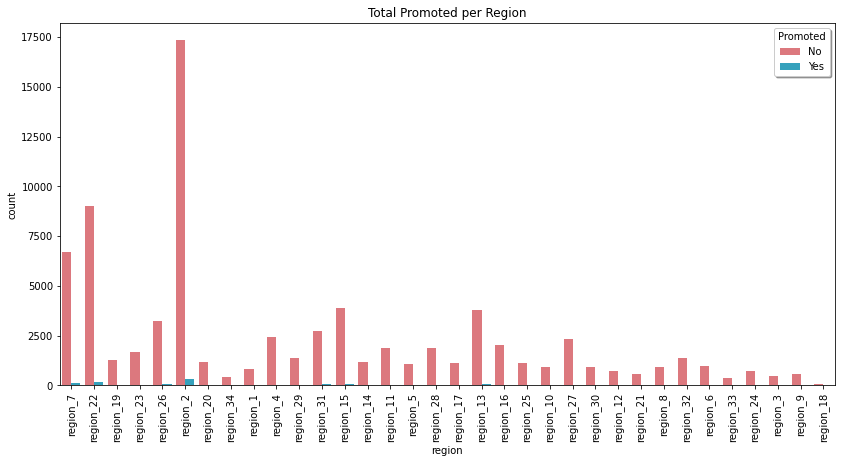

In [16]:
#Exploratory Data Analysis (EDA) Categorical Variables
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='region',hue='label',palette=('#ED676F', '#1FAFD2'))
plt.title('Total Promoted per Region')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

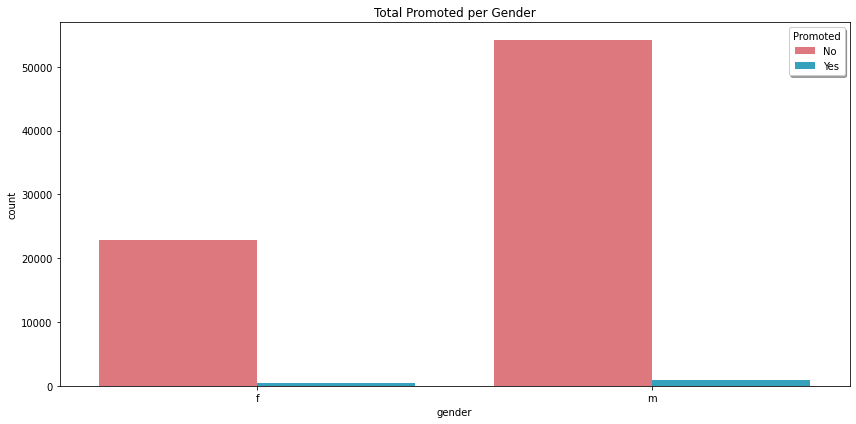

In [17]:
#Exploratory Data Analysis (EDA) Variabel Kategorik
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='gender',hue='label',palette=('#ED676F', '#1FAFD2'))
plt.title('Total Promoted per Gender')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


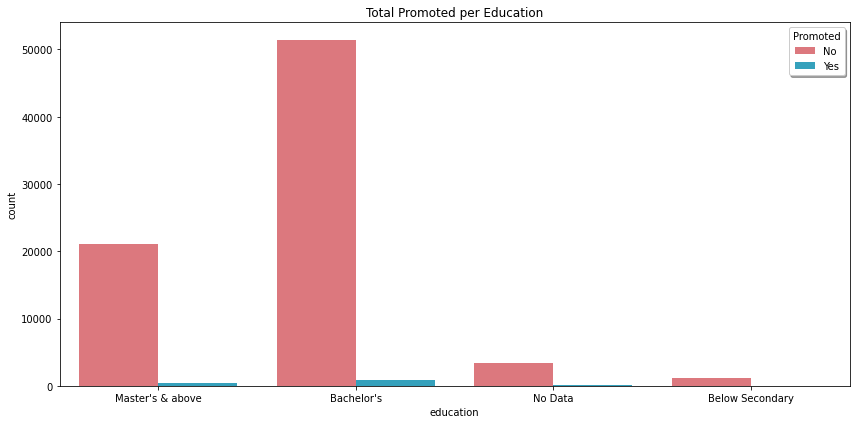

In [26]:
#Exploratory Data Analysis (EDA) Variabel Kategorik
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='education',hue='label', palette=('#ED676F', '#1FAFD2'))
plt.title('Total Promoted per Education')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()


C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


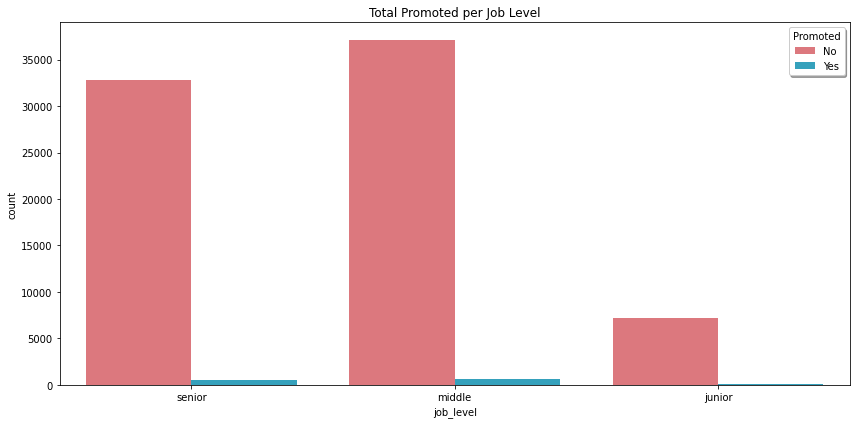

In [27]:
#Exploratory Data Analysis (EDA) Variabel Kategorik
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='job_level',hue='label', palette=('#ED676F', '#1FAFD2'))
plt.title('Total Promoted per Job Level')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


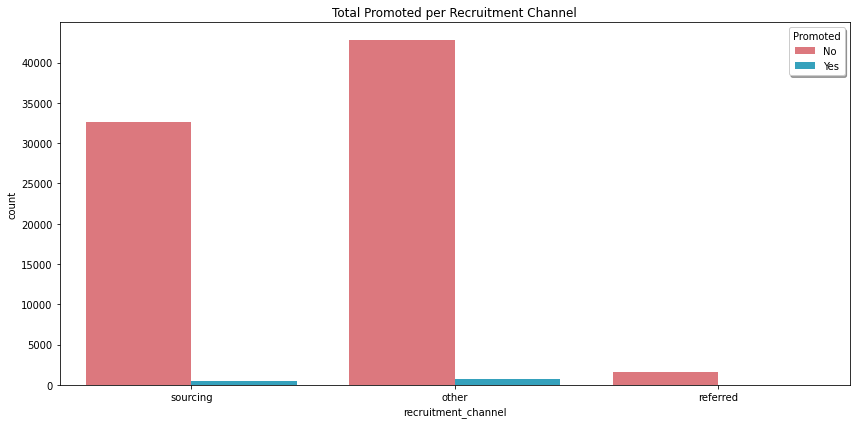

In [28]:
#Exploratory Data Analysis (EDA) Variabel Kategorik
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='recruitment_channel',hue='label', palette=('#ED676F', '#1FAFD2'))
plt.title('Total Promoted per Recruitment Channel')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


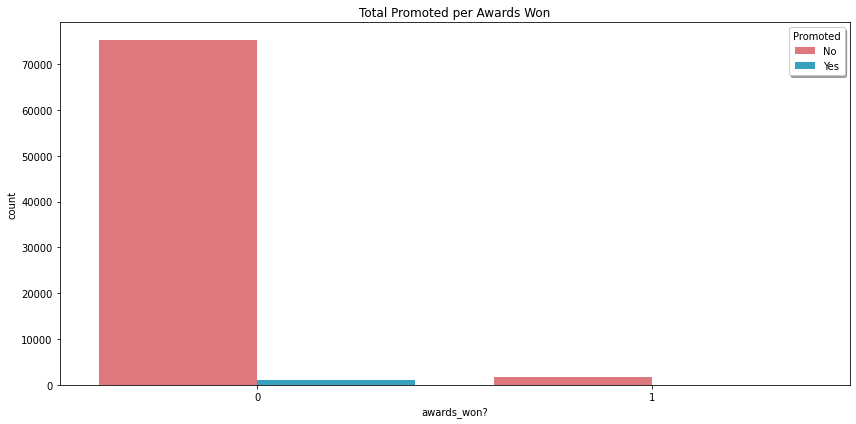

In [29]:
#Exploratory Data Analysis (EDA) Variabel Kategorik
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(data=cleaned_dataset,x='awards_won?',hue='label', palette=('#ED676F', '#1FAFD2'))
plt.title('Total Promoted per Awards Won')
legend=plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Promoted')
legend.get_texts()[0].set_text('No')
legend.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

In [37]:
#Data preparation by encoding data and sharing train and test data for model building
for column in cleaned_dataset.columns:
    if cleaned_dataset[column].dtype == np.number: continue
    cleaned_dataset[column] = LabelEncoder().fit_transform(cleaned_dataset[column])
    
# Predictor dan target
X = cleaned_dataset.drop('label', axis=1)
y = cleaned_dataset['label']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#SMOTE Oversampling Data Training
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train, y_train=smote.fit_resample(x_train, y_train)

# Print according to the expected result
print('The number of rows and columns of x_train is:', x_train.shape, ', while the Number of rows and columns of y_train is:', y_train.shape)
print('The percentage of Promoted in the Training data is:')
print(y_train.value_counts(normalize=True))
print('The number of rows and columns of x_test is:', x_test.shape, ', while the Number of rows and columns of y_test is:', y_test.shape)
print('The percentage of Promoted in the Testing data is:')
print(y_test.value_counts(normalize=True))

C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


The number of rows and columns of x_train is: (107892, 14) , while the Number of rows and columns of y_train is: (107892,)
The percentage of Promoted in the Training data is:
1    0.5
0    0.5
Name: label, dtype: float64
The number of rows and columns of x_test is: (23490, 14) , while the Number of rows and columns of y_test is: (23490,)
The percentage of Promoted in the Testing data is:
0    0.984504
1    0.015496
Name: label, dtype: float64


In [38]:
# Modelling using Logistic Regression Algorithm
log_model=LogisticRegression().fit(x_train, y_train)
print('The Logistic Regression model formed is: \n', log_model)

The Logistic Regression model formed is: 
 LogisticRegression()


C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [39]:
# Model performance testing using Logistic Regression Algorithm based on training data
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     53946
           1       0.90      0.98      0.94     53946

    accuracy                           0.94    107892
   macro avg       0.94      0.94      0.94    107892
weighted avg       0.94      0.94      0.94    107892

0.9366218069921773


C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


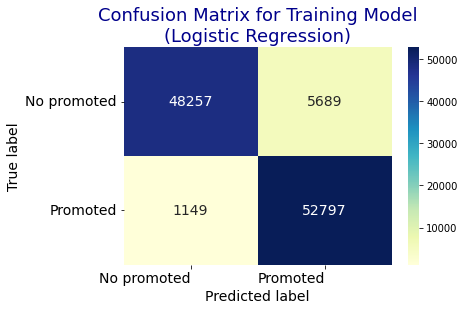

In [40]:
# Testing model performance using Logistic Regression Algorithm based on training data - Displaying Plots of heatmap confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [41]:
# Model performance testing using Logistic Regression Algorithm based on data testing
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     23126
           1       0.12      0.94      0.22       364

    accuracy                           0.89     23490
   macro avg       0.56      0.92      0.58     23490
weighted avg       0.99      0.89      0.93     23490

0.8945083014048532


C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


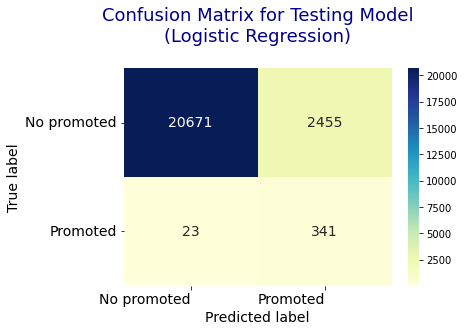

In [42]:
# Model performance testing using Logistic Regression Algorithm based on data testing - Displaying Plots of heatmap confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


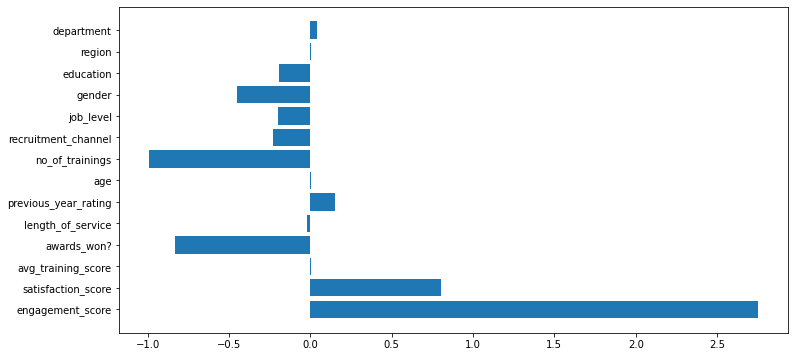

In [43]:
importance = log_model.coef_[0]
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(X.columns, importance, align='center')
ax.invert_yaxis()
plt.show()

In [44]:
# Modeling using the Random Forest Classifier Algorithm
rdf_model=RandomForestClassifier().fit(x_train, y_train)
print('The Random Forest Classifier model formed is: \n', rdf_model)

The Random Forest Classifier model formed is: 
 RandomForestClassifier()


In [45]:
# Testing the performance of the model using the Random Forest Classifier Algorithm based on training data
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53946
           1       1.00      1.00      1.00     53946

    accuracy                           1.00    107892
   macro avg       1.00      1.00      1.00    107892
weighted avg       1.00      1.00      1.00    107892

1.0


C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


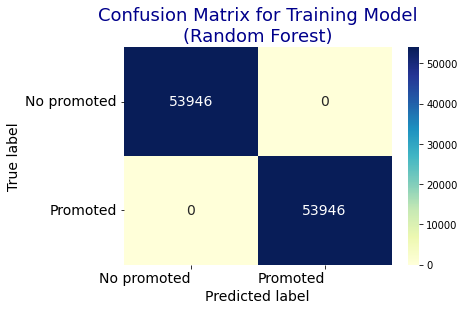

In [46]:
# Testing the performance of the model using the Random Forest Classifier Algorithm based on training data - Displaying Plots of heatmap confusion matrix

confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [47]:
# Testing the performance of the model using the Random Forest Classifier Algorithm based on data testing
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     23126
           1       0.22      0.29      0.25       364

    accuracy                           0.97     23490
   macro avg       0.61      0.64      0.62     23490
weighted avg       0.98      0.97      0.97     23490

0.9731800766283525


C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


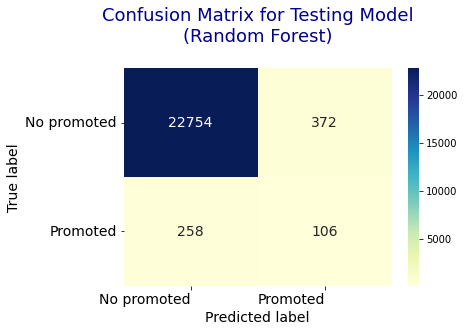

In [48]:
# Testing the performance of the model using the Random Forest Classifier Algorithm based on data testing - Displaying Plots of heatmap confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


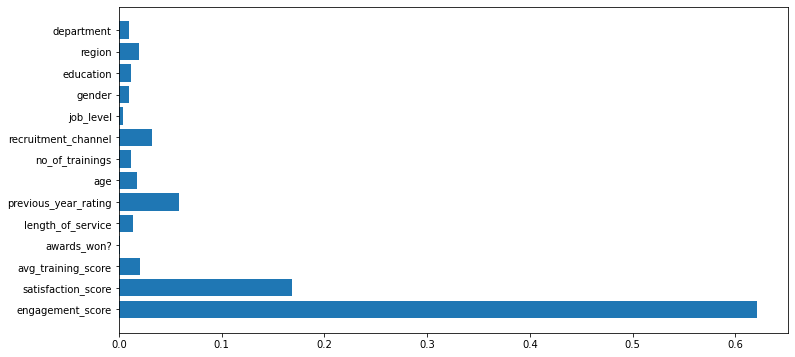

In [49]:
importance = rdf_model.feature_importances_
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(X.columns, importance, align='center')
ax.invert_yaxis() 
plt.show()

In [50]:
# Modeling using the Gradient Boosting Classifier Algorithm
gbt_model=GradientBoostingClassifier().fit(x_train, y_train)
print('The Random Forest Classifier model formed is: \n', gbt_model)

The Random Forest Classifier model formed is: 
 GradientBoostingClassifier()


In [51]:
# Testing the performance of the model using the Gradient Boosting Classifier Algorithm based on training data
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     53946
           1       0.95      1.00      0.97     53946

    accuracy                           0.97    107892
   macro avg       0.97      0.97      0.97    107892
weighted avg       0.97      0.97      0.97    107892

0.9724817410002595


C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


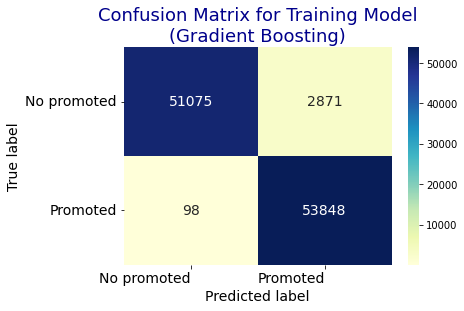

In [52]:
# Testing the performance of the model using the Gradient Boosting Classifier Algorithm based on training data - Displaying Plots of heatmap confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [53]:
# Testing the performance of the model using the Gradient Boosting Classifier Algorithm based on data testing
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23126
           1       0.20      0.89      0.33       364

    accuracy                           0.94     23490
   macro avg       0.60      0.92      0.65     23490
weighted avg       0.99      0.94      0.96     23490

0.9442315879097488


C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


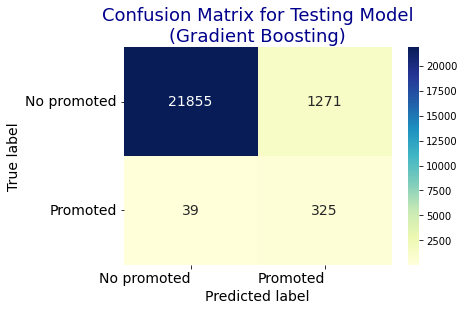

In [54]:
# Testing the performance of the model using the Gradient Boosting Classifier Algorithm based on data testing - Displaying Plots of heatmap confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No promoted', 'Promoted'), ('No promoted', 'Promoted'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


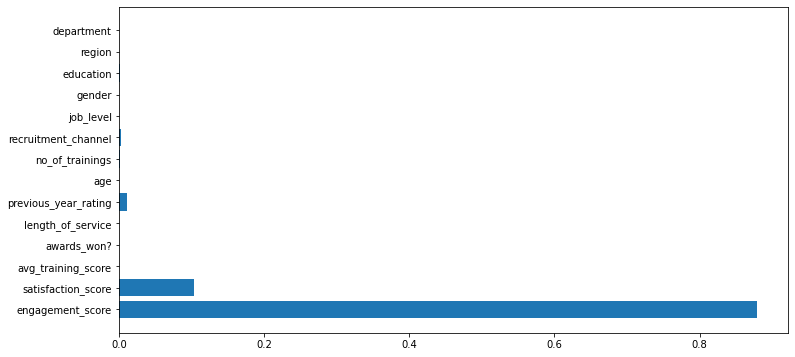

In [55]:
importance = gbt_model.feature_importances_
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(X.columns, importance, align='center')
ax.invert_yaxis()  
plt.show()